# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from helper_functions import *

import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import Model
from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.layers import Input, Activation, Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.layers import RandomCrop, RandomFlip, RandomHeight, RandomWidth, RandomZoom, RandomRotation, Rescaling
# from tensorflow.keras import mixed_precision
import tensorflow_datasets as tfds

# Importing Food101 dataset

In [2]:
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=False,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.78LJHO_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.78LJHO_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


# Investigate our Food101 dataset
* what is the input data shape, dtype, min and max pixel values
* Are the images of a consistent size?
* Are they scaled?
* Are the data in batches?
* How do the labels look like? (are they one-hot or labeled encoded?)
* What are the class names?
* Do labels match the class names?

In [3]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [4]:
class_names = ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [5]:
for image, label in train_data.take(3):
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Image pixel value, min: {tf.reduce_min(image)}, max: {tf.reduce_max(image)}
  Label dtype: {label.dtype}
  Label value: {label}
  Label value (str format): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Image pixel value, min: 0, max: 255
  Label dtype: <dtype: 'int64'>
  Label value: 56
  Label value (str format): huevos_rancheros
  

  Image shape: (384, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Image pixel value, min: 0, max: 255
  Label dtype: <dtype: 'int64'>
  Label value: 76
  Label value (str format): pizza
  

  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Image pixel value, min: 0, max: 255
  Label dtype: <dtype: 'int64'>
  Label value: 21
  Label value (str format): chocolate_cake
  


In [6]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 66,  79,  53],
        [ 67,  80,  54],
        [ 68,  80,  56],
        ...,
        [ 67,  90,  98],
        [ 64,  87,  95],
        [ 62,  85,  93]],

       [[ 66,  79,  53],
        [ 67,  80,  54],
        [ 68,  80,  56],
        ...,
        [ 82, 102, 111],
        [ 78,  98, 107],
        [ 75,  95, 104]],

       [[ 67,  79,  55],
        [ 68,  80,  56],
        [ 69,  81,  57],
        ...,
        [ 94, 111, 119],
        [ 91, 108, 116],
        [ 88, 105, 113]],

       ...,

       [[ 27,   7,   6],
        [ 26,   6,   5],
        [ 25,   5,   6],
        ...,
        [ 18,  16,  21],
        [ 16,  15,  23],
        [ 16,  15,  23]],

       [[ 28,   7,   6],
        [ 26,   6,   5],
        [ 25,   5,   4],
        ...,
        [ 17,  15,  20],
        [ 16,  13,  22],
        [ 17,  14,  23]],

       [[ 27,   6,   5],
        [ 26,   5,   4],
        [ 25,   5,   4],
        ...,
        [ 16,  14,  1

## Conclusions drawn
* Image sizes are not consisent, we must resize all image tensors for consistency
* Image tensors are in the wrong datatype (typically should be `tf.float32`)
* Images are not scaled (pixel values between 0 & 1), but this is not an issue as we are going to use `EfficientNetB0` as our backbone
* Labels are labeled encoded (during compilation we must use `SpareCaegoricalCrossentropy`)

## Let's visualize an image

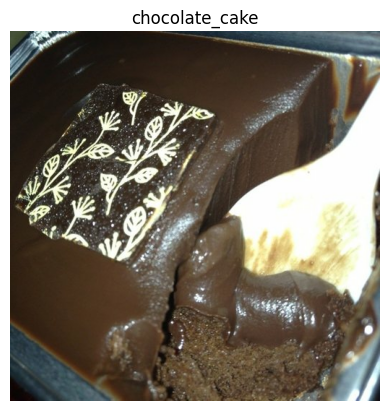

In [7]:
plt.imshow(image)
plt.axis("off")
plt.title(class_names[label.numpy()]);

# Constructing an input pipeline

In [8]:
train_data = train_data.map(image_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)  # Apply preprocessing with parallelism
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)  # Shuffle, batch, and prefetch

test_data = test_data.map(image_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)  # Apply preprocessing with parallelism
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)  # Batch and prefetch

In [9]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# Starting our experiments

![alt text](hmm.png)

## model_0

In [10]:
model_0 = build_model(model_name="model_0",
                      num_classes=len(class_names),
                      backbone=EfficientNetB0,
                      with_data_aug=False,
                      normalize=False,
                      add_bottleneck_layer=False,
                      with_regularization_and_dropout=False,
                      use_transfer_learning=True)
model_0.summary()

<DTypePolicy "mixed_float16">
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "model_0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ logits_layer (Dense)                 │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_1 (Cast)                        │ (None, 101)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_output_layer (Activation) │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [21]:
for layer in model_0.layers:
  print(f"""
        Layer name: {layer.name}
        Trainable: {layer.trainable}
        Layer dtype: {layer.dtype}
        Layer output dtype: {layer.output.dtype}
        Layer compute dtype: {layer.compute_dtype}

  """)


        Layer name: input_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float32
        Layer compute dtype: float16

  

        Layer name: efficientnetb0
        Trainable: False
        Layer dtype: float32
        Layer output dtype: float16
        Layer compute dtype: float16

  

        Layer name: global_average_pooling_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float16
        Layer compute dtype: float16

  

        Layer name: logits_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float16
        Layer compute dtype: float16

  

        Layer name: activation_output_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float32
        Layer compute dtype: float32

  


In [11]:
history_model_0 = model_0.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.15*len(test_data)),
                              callbacks=prepare_callbacks(checkpoint_name="feature_extraction_without_data_augmentation_model_0",
                                                          logs_name="feature_extraction_without_data_augmentation_model_0")
                              )

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4727 - loss: 2.2952
Epoch 1: val_accuracy improved from -inf to 0.70021, saving model to ./checkpoints/feature_extraction_without_data_augmentation_model_0.weights.h5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 272s 96ms/step - accuracy: 0.4728 - loss: 2.2950 - val_accuracy: 0.7002 - val_loss: 1.1300 - learning_rate: 0.0010
Epoch 2/5
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6654 - loss: 1.3003
Epoch 2: val_accuracy improved from 0.70021 to 0.71663, saving model to ./checkpoints/feature_extraction_without_data_augmentation_model_0.weights.h5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 195s 79ms/step - accuracy: 0.6654 - loss: 1.3003 - val_accuracy: 0.7166 - val_loss: 1.0309 - learning_rate: 0.0010
Epoch 3/5
2366/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7002 - loss: 1.1524
Epoch 3: val_accuracy improved from 0.71663 to 0.72458, saving model to ./checkpoints/feature_extraction_without_data_augmentation_model_0.weights.

In [12]:
result_model_0 = model_0.evaluate(test_data)
result_model_0

790/790 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.7302 - loss: 0.9774


[0.976811408996582, 0.7320792078971863]

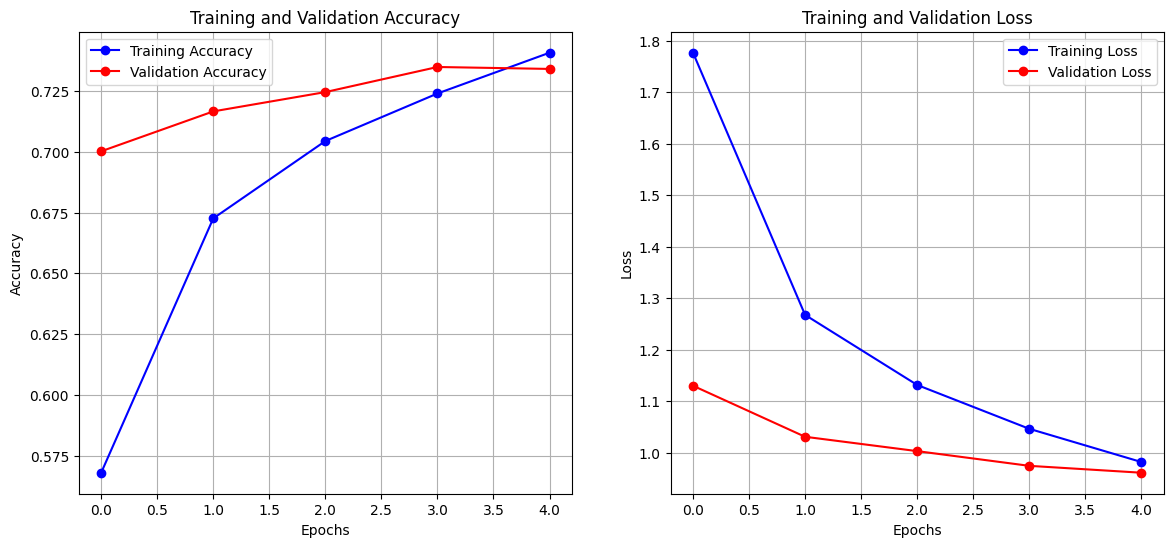

In [13]:
plot_history(history_model_0)

## model_1

In [14]:
model_1 = build_model(model_name="model_1",
                      num_classes=len(class_names),
                      backbone=EfficientNetB0,
                      with_data_aug=True,
                      normalize=False,
                      add_bottleneck_layer=False,
                      with_regularization_and_dropout=False,
                      use_transfer_learning=True)
model_1.summary()

<DTypePolicy "mixed_float16">


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_3 (Cast)                        │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation_layer (Sequential) │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ logits_layer (Dense)                 │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_4 (Cast)                        │ (None, 101)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_output_layer (Activation) │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [20]:
for layer in model_1.layers:
  print(f"""
        Layer name: {layer.name}
        Trainable: {layer.trainable}
        Layer dtype: {layer.dtype}
        Layer output dtype: {layer.output.dtype}
        Layer compute dtype: {layer.compute_dtype}

  """)


        Layer name: input_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float32
        Layer compute dtype: float16

  

        Layer name: data_augmentation_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float16
        Layer compute dtype: float16

  

        Layer name: efficientnetb0
        Trainable: False
        Layer dtype: float32
        Layer output dtype: float16
        Layer compute dtype: float16

  

        Layer name: global_average_pooling_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float16
        Layer compute dtype: float16

  

        Layer name: logits_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float16
        Layer compute dtype: float16

  

        Layer name: activation_output_layer
        Trainable: True
        Layer dtype: float32
        Layer output dtype: float32
        Layer com

In [15]:
history_model_1 = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.15*len(test_data)),
                              callbacks=prepare_callbacks(checkpoint_name="feature_extraction_with_data_augmentation_model_1",
                                                          logs_name="feature_extraction_with_data_augmentation_model_1")
                              )

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3982 - loss: 2.6308
Epoch 1: val_accuracy improved from -inf to 0.64539, saving model to ./checkpoints/feature_extraction_with_data_augmentation_model_1.weights.h5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 359s 144ms/step - accuracy: 0.3983 - loss: 2.6306 - val_accuracy: 0.6454 - val_loss: 1.3071 - learning_rate: 0.0010
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5690 - loss: 1.7000
Epoch 2: val_accuracy improved from 0.64539 to 0.68035, saving model to ./checkpoints/feature_extraction_with_data_augmentation_model_1.weights.h5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 322s 135ms/step - accuracy: 0.5691 - loss: 1.7000 - val_accuracy: 0.6803 - val_loss: 1.1895 - learning_rate: 0.0010
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5990 - loss: 1.5623
Epoch 3: val_accuracy improved from 0.68035 to 0.68988, saving model to ./checkpoints/feature_extraction_with_data_augmentation_model_1.weights.h5
2

In [16]:
result_model_1 = model_1.evaluate(test_data)
result_model_1

790/790 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6897 - loss: 1.1298


[1.1306145191192627, 0.6918416023254395]

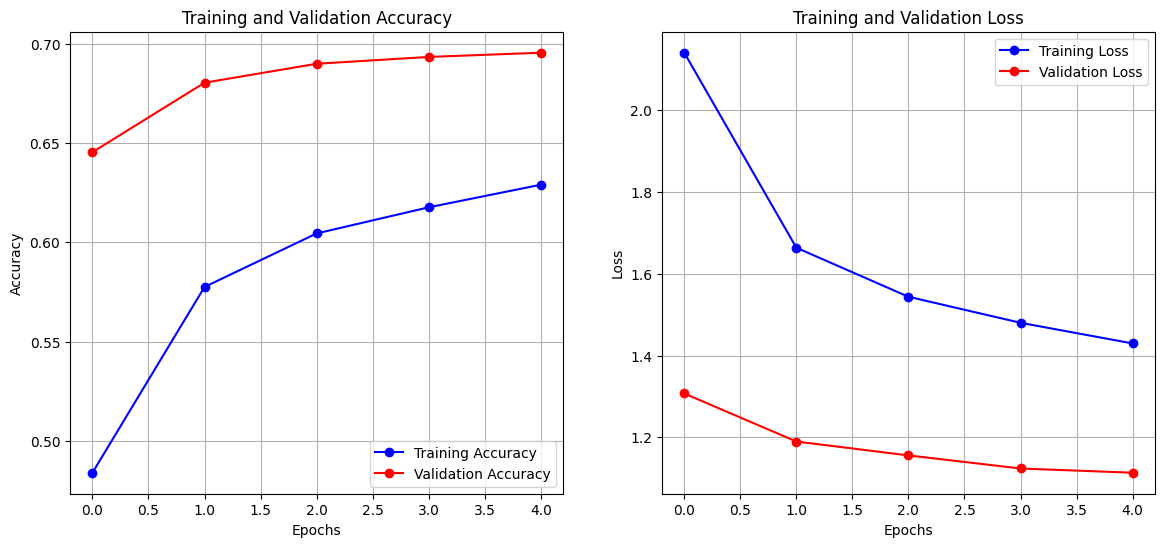

In [17]:
plot_history(history_model_1)